# Understanding Over & Underfitting
## Predicting Boston Housing Prices

## Getting Started
In this project, you will use the Boston Housing Prices dataset to build several models to predict the prices of homes with particular qualities from the suburbs of Boston, MA.
We will build models with several different parameters, which will change the goodness of fit for each. 

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns

---
## Data Exploration
Since we want to predict the value of houses, the **target variable**, `'MEDV'`, will be the variable we seek to predict.

### Import and explore the data. Clean the data for outliers and missing values. 

In [2]:
# Your code here

# Importing the dataset
boston = pd.read_csv('../data/boston_data.csv')

# Checking for the data types - everything is float
print(boston.dtypes, '\n')

# Checking for nans - there are none
print(boston.isna().sum())

crim       float64
zn         float64
indus      float64
chas       float64
nox        float64
rm         float64
age        float64
dis        float64
rad        float64
tax        float64
ptratio    float64
black      float64
lstat      float64
medv       float64
dtype: object 

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64


In [3]:
# Looking at the data
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5


### Removing outliers

In [4]:
'''Z-Score Method of removing outliers'''
from scipy.stats import zscore

z = np.abs(zscore(boston))
print(z, '\n')  # this gives me the zscores of everything

# The first array contains the list of row numbers and the second array the respective column numbers, 
# which means z[9][3] has a Z-score higher than 3.
#print(np.where(z > 3), '\n')
display(np.where(z > 3))
print(z[9][3])  # confirmation that this data point indeed has a z-score higher than 3

# Removing the outliers
print(boston.shape)
boston_no_out = boston[(z < 3).all(axis = 1)]  # keeping just the values that have a z-score lower than 3
print(boston_no_out.shape)  # 83 outliers removed

[[0.39988956 0.47714971 0.05581469 ... 0.23175972 0.39310312 0.06938262]
 [0.40610035 0.65785078 0.89031483 ... 0.44326188 0.48852577 0.30731398]
 [0.3785481  0.47714971 0.18951101 ... 0.43626832 0.38009094 0.22800353]
 ...
 [0.41598186 3.60885208 1.46623746 ... 0.42863899 1.36467925 3.13702567]
 [0.41536167 3.38185198 1.53528941 ... 0.44326188 0.98732602 0.27051932]
 [0.40843331 0.88485088 0.91969864 ... 0.25793258 0.90202395 0.15721867]] 



(array([  9,  14,  20,  28,  29,  34,  36,  37,  38,  47,  53,  56,  57,
         62,  67,  70,  71,  71,  79,  88,  89,  91,  98, 101, 106, 111,
        111, 112, 114, 116, 136, 141, 148, 148, 150, 158, 160, 160, 161,
        165, 166, 170, 170, 177, 184, 192, 196, 198, 200, 200, 202, 205,
        212, 214, 218, 223, 226, 232, 234, 238, 241, 246, 250, 251, 251,
        252, 252, 254, 258, 258, 264, 272, 272, 272, 273, 273, 285, 285,
        297, 303, 304, 312, 314, 314, 321, 333, 337, 341, 347, 352, 355,
        369, 380, 382, 382, 400, 400, 401, 401, 401, 402]),
 array([ 3, 11, 11,  1,  7,  0, 13,  3, 11,  3,  1,  3,  1, 11,  3,  1,  3,
        13,  3, 13,  5, 11,  3,  1,  1,  1,  7,  1,  0,  0,  3, 11,  3,  5,
         3,  3,  1, 13,  7,  3,  3, 11, 12,  5, 11,  1, 11,  3,  5, 13,  3,
         3,  1, 11,  3, 11, 13,  1,  5,  3, 11, 11,  3,  1,  7,  1,  7,  3,
        11, 12,  3,  3,  5, 13,  0, 11,  0, 11,  3,  5, 11, 11,  1, 13,  1,
        11,  1,  3, 13, 13, 11,  3,  0,  3, 13,  

3.6645015252516178
(404, 14)
(321, 14)


In [5]:
'''IQR method of removing outliers'''
Q1 = boston.quantile(0.25)
Q3 = boston.quantile(0.75)
IQR = Q3 - Q1
#print(IQR)  # IQR for every column

# Removing the outliers
## the ~ acts as a not (so I have not boston < (Q1 - 1.5 * IQR) which is boston > Q1 - 1.5 * IQR - same logic for
### the other part
## the 'or' turns into an 'and' as well
boston_df_out = boston[~((boston < (Q1 - 1.5 * IQR)) | (boston > (Q3 + 1.5 * IQR))).any(axis = 1)]  # removes too much?
print(boston_df_out.shape)  # 176 removed! :o

# Since the IQR method removed a lot of outliers, I decided to go with the z-score option (next cells)

(228, 14)


In [6]:
# Found some functions online and decided to make this one to remove the outliers with the Z-Score method
def z_score_outliers(df, threshold = 3):
    '''
    Takes a DataFrame as input, and a default threshold (3), which can be changed, and returns the cleaned DataFrame,
    without the outliers.
    '''
    z = np.abs(zscore(df))
    df_clean = df[(z < threshold).all(axis = 1)]
    print('Number of outliers/rows removed:', df.shape[0] - df_clean.shape[0])
    return df_clean

# Removing the outliers from the whole DF except the 'chas' column which is binary, and therefore loses the 1's
## without this drop both methods were removing all the 1's from this column
boston_clean = z_score_outliers(boston.drop(columns = 'chas'))

# Adding the 'chas' column back to the DF
boston_clean = boston_clean.join(boston['chas'])

# Testing to see if everything is ok now - we're all good.
boston_clean[boston_clean['chas'] == 1.0].head()

Number of outliers/rows removed: 60


,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,chas
9,1.41385,0.0,19.58,0.871,6.129,96.0,1.7494,5.0,403.0,14.7,321.02,15.12,17.0,1.0
37,0.44791,0.0,6.20,0.507,6.726,66.5,3.6519,8.0,307.0,17.4,360.20,8.05,29.0,1.0
47,3.53501,0.0,19.58,0.871,6.152,82.6,1.7455,5.0,403.0,14.7,88.01,15.02,15.6,1.0
56,0.22188,20.0,6.96,0.464,7.691,51.8,4.3665,3.0,223.0,18.6,390.77,6.58,35.2,1.0
67,0.21719,0.0,10.59,0.489,5.807,53.8,3.6526,4.0,277.0,18.6,390.94,16.03,22.4,1.0


### Next, we want to explore the data. Pick several variables you think will be most correlated with the prices of homes in Boston, and create plots that show the data dispersion as well as the regression line of best fit.

In [9]:
# Checking the correlation with the medv variable
## 'rm' is the most positively correlated - 0.7 - and 'lstat' is the most negatively correlated with -0.7
boston_clean.corr()[['medv']][:-2].sort_values('medv', ascending = False)

,medv
rm,0.718521
zn,0.352506
dis,0.321378
black,0.283520
rad,-0.420190
ptratio,-0.441173
age,-0.457426
nox,-0.476195
crim,-0.502947
tax,-0.535423


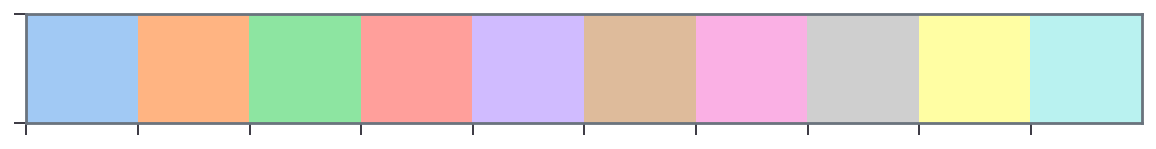

In [10]:
sns.set_palette('pastel')  # this sets this palette for the whole notebook

# Checking the colors of this palette
palette = sns.color_palette('pastel')
sns.palplot(palette)

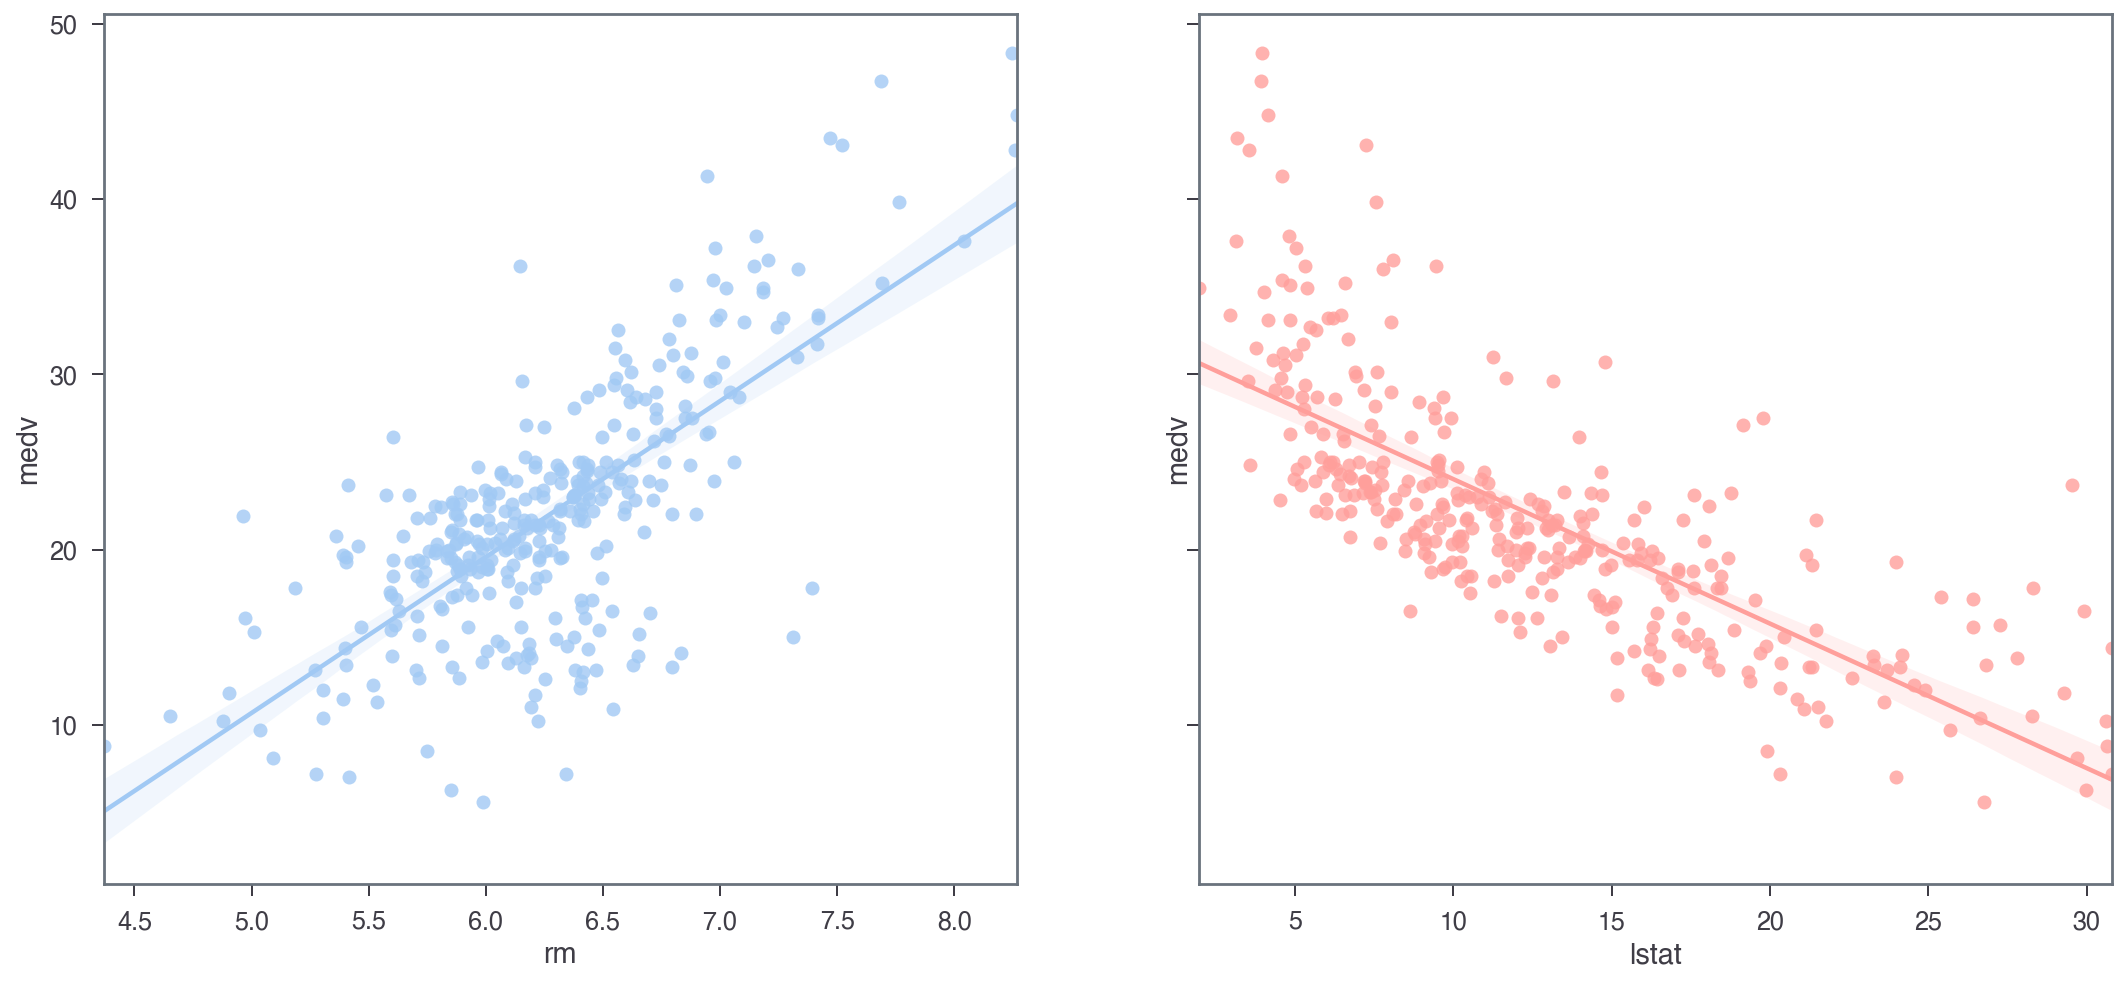

In [11]:
# Plots
# I decided to plot these 2 as they are the most positively and negatively correlated with medv
fig, axs = plt.subplots(1, 2, sharey = True, figsize = (18, 8))
sns.regplot(x = 'rm', y = 'medv', data = boston_clean, ax = axs[0], color = palette[0])
sns.regplot(x = 'lstat', y = 'medv', data = boston_clean, ax = axs[1], color = palette[3]);

### What do these plots tell you about the relationships between these variables and the prices of homes in Boston? Are these the relationships you expected to see in these variables?

In [ ]:
# Your response here
'''
These plots tell me what I had seen above with the pandas' correlation dataframe.
RM is the most positively correlated and LSTAT is the most negatively correlated with MEDV.
'''

### Make a heatmap of the remaining variables. Are there any variables that you did not consider that have very high correlations? What are they?

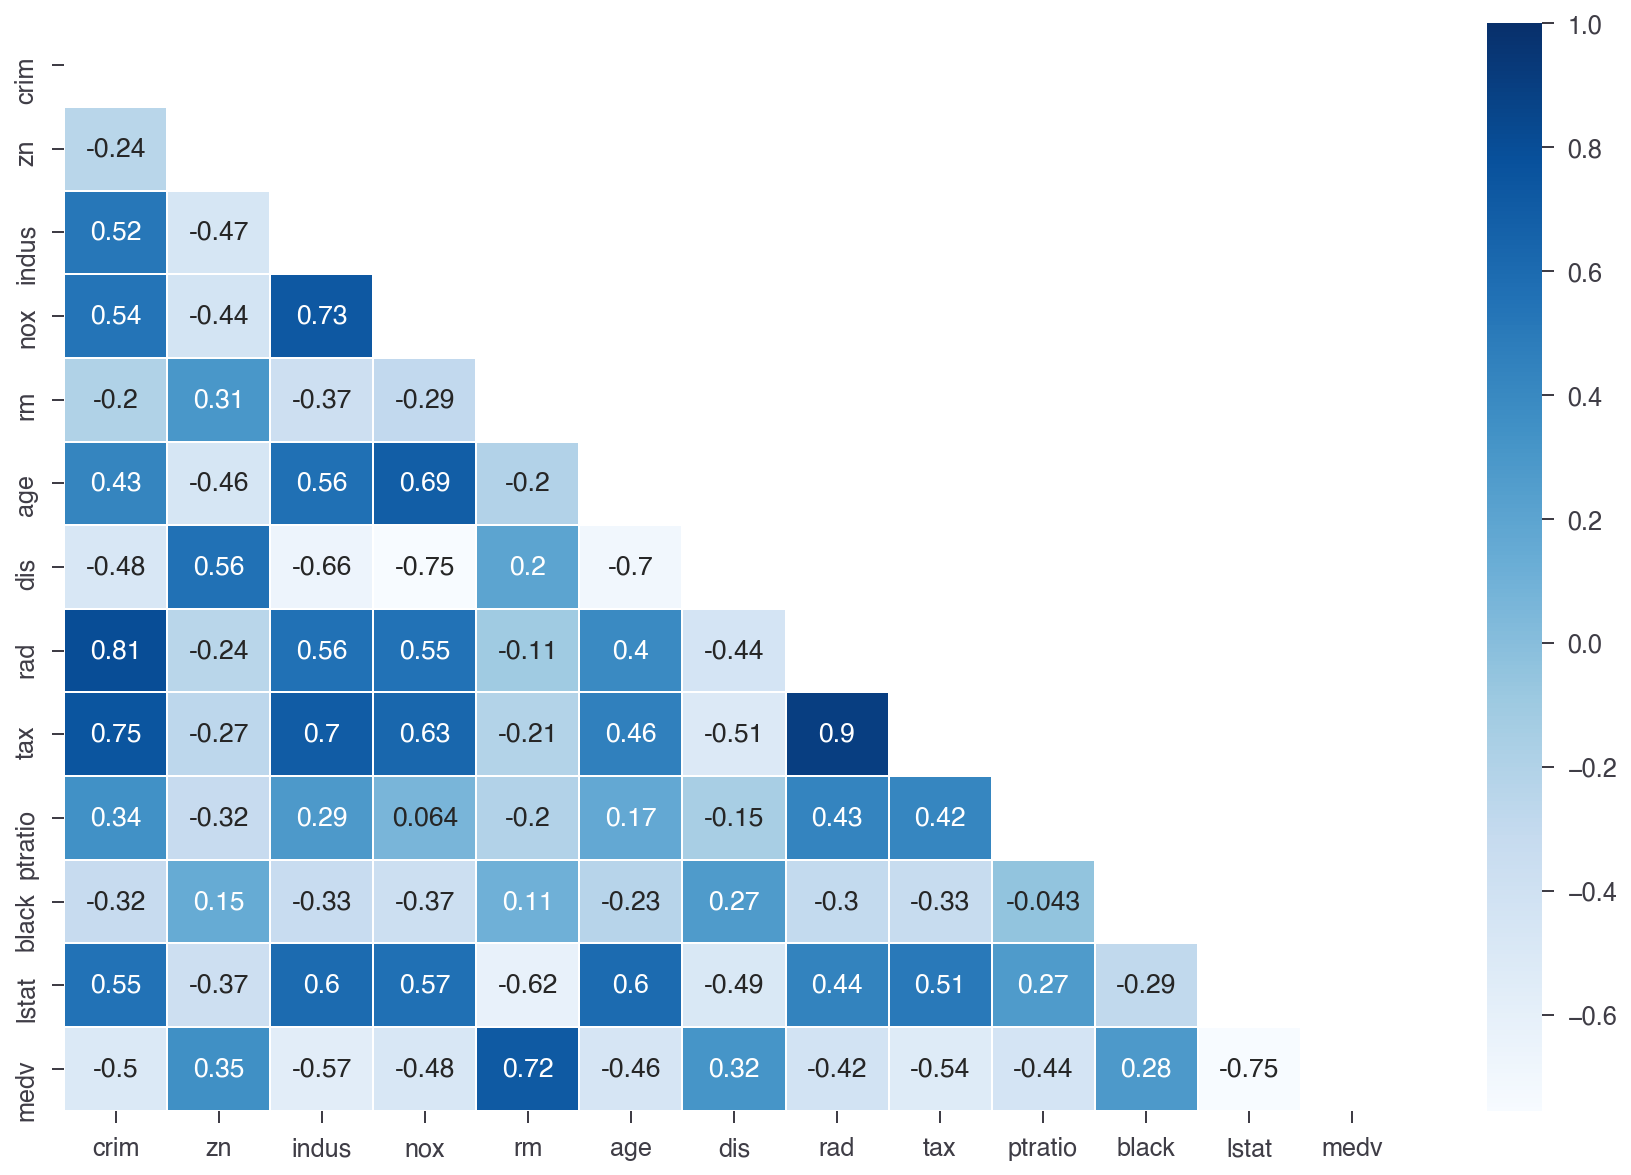

In [12]:
# Your response here
plt.figure(figsize = (15, 10))  # to increase the figure size
correlation = boston_clean.drop(columns = 'chas').corr()  # doing the corr without 'chas' column 'cause it's useless
mask = np.triu(np.ones_like(correlation, dtype = np.bool))  # to cut the duplicate part of the matrix
sns.heatmap(correlation, linewidths = 0.5, annot = True, mask = mask, cmap = 'Blues');  # the actual heatmap

### Calculate Statistics
Calculate descriptive statistics for housing price. Include the minimum, maximum, mean, median, and standard deviation. 

In [13]:
# Your code here
# With the .describe() method we have everything done for us :)
boston_clean.describe()[['medv']]  # the median is the 50%

,medv
count,344.000000
mean,21.870349
std,7.049946
min,5.600000
25%,17.800000
50%,21.400000
75%,24.700000
max,48.300000


----

## Developing a Model

### Implementation: Define a Performance Metric
What is the performance meteric with which you will determine the performance of your model? Create a function that calculates this performance metric, and then returns the score. 

In [14]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    # Your code here:
    mae = mean_absolute_error(y_true, y_predict)
    mse = mean_squared_error(y_true, y_predict)
    r2_score = r2_score(y_true, y_predict)
    
    return mae, mse, r2_score

### Implementation: Shuffle and Split Data
Split the data into the testing and training datasets. Shuffle the data as well to remove any bias in selecting the training and test.

In [15]:
# Your code here
from sklearn.model_selection import train_test_split

# Defining the X (data) and y (target)
X = boston_clean.drop(columns = 'medv')
y = boston_clean['medv']

# Splitting the X and y
## this already shuffles the data by default
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 18)

----

## Analyzing Model Performance
Next, we are going to build a Random Forest Regressor, and test its performance with several different parameter settings.

### Learning Curves
Lets build the different models. Set the max_depth parameter to 2, 4, 6, 8, and 10 respectively. 

In [16]:
# Five separate RFR here with the given max depths
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor

# Decided to try this with a pipeline
'''
scores = []
for k in range(2, 12, 2):
    RFR = make_pipeline(RandomForestRegressor(max_depth = k, random_state = 18))
    model = RFR.fit(X_train, y_train)
    scores.append(RFR.score(X_test, y_test))
    
    print(RFR.score(X_test, y_test))

After looking at this for a little while I realized that I didn't need this make_pipeline at all and that a simple
list comprehension would work, as shown below
'''
# Getting the test scores
test_scores = [RandomForestRegressor(max_depth = k, random_state = 18).fit(X_train, y_train).score(X_test, y_test)
               for k in range(2, 12, 2)]

# Getting the train scores
## naturally, these results are much better, as the model already knows the training sets, right?
## still, I would expect them to be like 100%? Since the model was trained on this set...? It's close anyway, 97% on the last one
train_scores = [RandomForestRegressor(max_depth = k, random_state = 18).fit(X_train, y_train).score(X_train, y_train)
                for k in range(2, 12, 2)]

# Printing the results
print(test_scores)
print(train_scores)

[0.6037676292201596, 0.778970869588506, 0.7976262784851444, 0.7997341663130492, 0.8032242382674016]
[0.7615387902758435, 0.8938263475479661, 0.9444966936854827, 0.9639369769471796, 0.9705307730778272]


Now, plot the score for each tree on the training set and on the testing set.

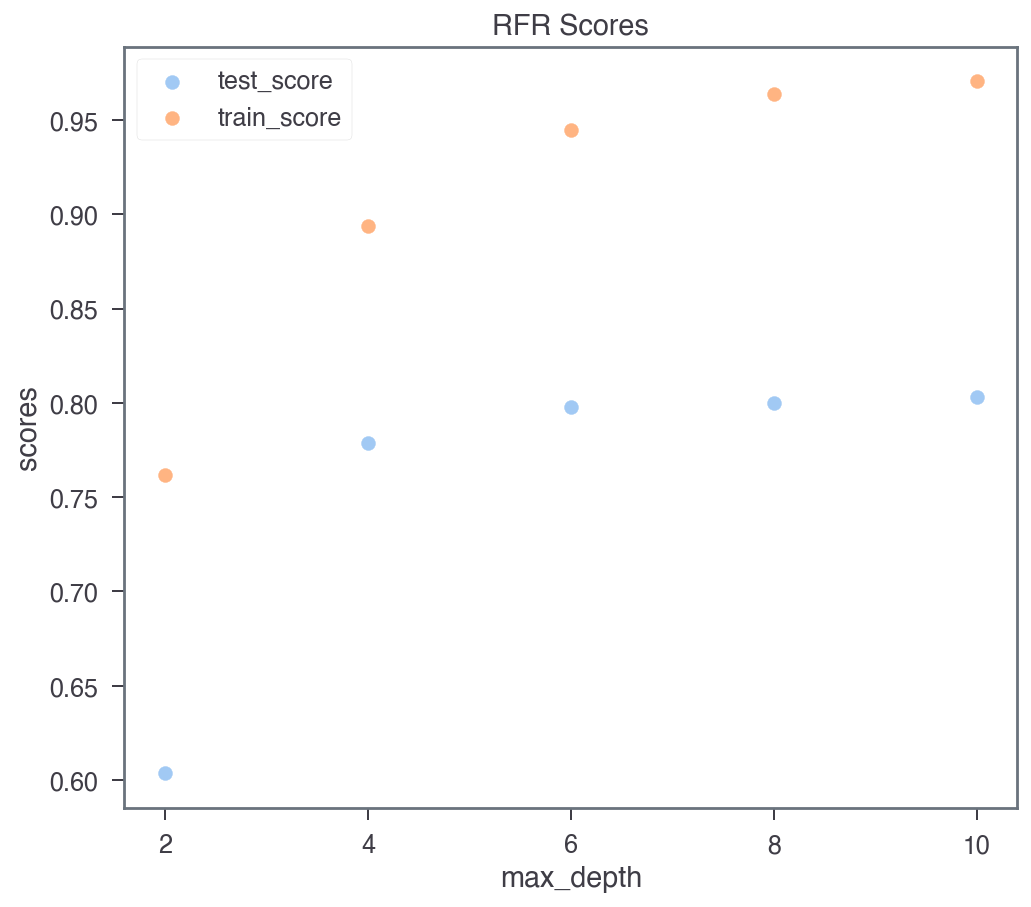

In [36]:
# Produce a plot with the score for the testing and training for the different max depths
plt.scatter(['2', '4', '6', '8', '10'], test_scores, label = 'test_score')
plt.scatter(['2', '4', '6', '8', '10'], train_scores, label = 'train_score')
plt.xlabel('max_depth')
plt.ylabel('scores')
plt.legend()
plt.title('RFR Scores');

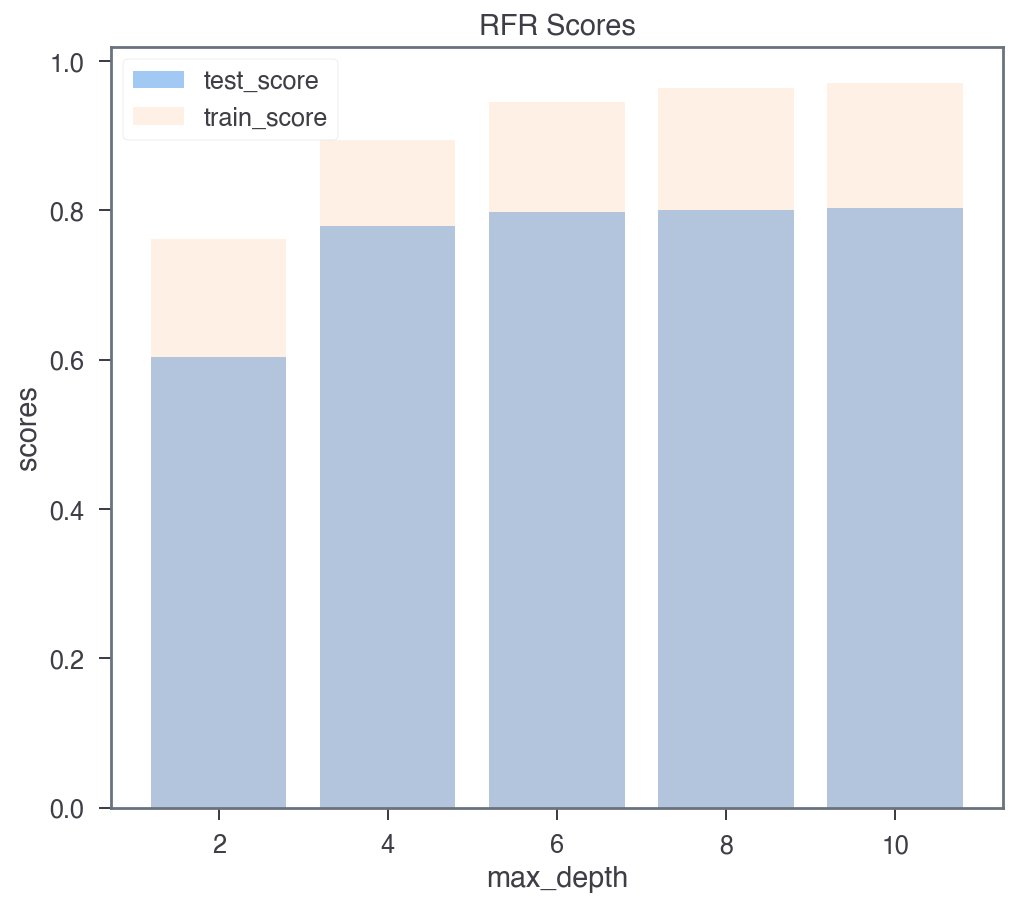

In [35]:
# Bar plot version of the same plot above
plt.bar(['2', '4', '6', '8', '10'], test_scores, label = 'test_score')
plt.bar(['2', '4', '6', '8', '10'], train_scores, label = 'train_score', alpha = 0.2)
plt.xlabel('max_depth')
plt.ylabel('scores')
plt.legend()
plt.title('RFR Scores');

What do these results tell you about the effect of the depth of the trees on the performance of the model?

In [ ]:
# Your response here
'''
It seems that the higher the max_depth parameter is, the better the model's score/performance is, but at some point it will become stable and
won't improve anymore, as the graph is already starting to show.
'''

### Bias-Variance Tradeoff
When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10?

In [ ]:
# Your response here
#https://towardsdatascience.com/understanding-the-bias-variance-tradeoff-and-visualizing-it-with-example-and-python-code-7af2681a10a7
'''
High bias of a model is associated with the following:
 - Under-fitting — Fails to capture the data trends
 - Stresses more on generalization
 - High error on both the training and test dataset
 - An overly simplified model
Simpler models (like ours, if we choose a depth of 1, for instance), in general, fail to capture the complexity of 
high dimensional data and hence they have higher bias.

Variance:
 - Variance refers to the average variability in the model prediction for the given dataset.
 
High variance of a model is associated with the following:
 - Over-fitting — Ends up modelling the noise in the data set
 - Stresses more on fitting each data point as close as possible
 - Low error on training data, but high error on test data
 - An overly complex model and sparse training data.
'''

### Best-Guess Optimal Model
What is the max_depth parameter that you think would optimize the model? Run your model and explain its performance.

In [ ]:
# Your response here
'''
I think around 4-6 would be a good bet, specially 6 maybe, because after that it doesn't seem to change much, the curve starts to
stabilize and there's little to no improvement, and as we go in up depth we're risking more overfitting.
'''

### Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

In [ ]:
# Your response here